# Import packages

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn import metrics
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy

## Get list of S&P 500 stocks

In [2]:
# Get the list of S&P 500 stocks
sp500_stocks = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
print(sp500_stocks)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CDAY', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

In [3]:
# Set the start date and end date of previous data
date_today = str(datetime.date.today())
date_from_4_years = str(datetime.date.today() - datetime.timedelta(days=4*365))
date_yesterday = str(datetime.date.today() - datetime.timedelta(days=1))

## Get Historical Technical Data

In [4]:
# Loop through the first 5 tickers and get historical data
technical_df = pd.DataFrame()
for stock in sp500_stocks:
    try:
        # Get historical data for the current ticker from the past 2 years
        stock_historical_data = yf.download(stock, start=date_from_4_years, end=date_today, progress=False)
        # Add a new column for the stock symbol
        stock_historical_data['Symbol'] = stock
        technical_df = pd.concat([technical_df, stock_historical_data])
    except Exception as e:
        print(f"Error retrieving data for {stock}: {e}")


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
C:\Users\Adham\AppData\Local\Temp\ipykernel_12980\704201189.py:9: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  technical_df = pd.concat([technical_df, stock_historical_data])

1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-12-18 -> 2023-12-17)')
C:\Users\Adham\AppData\Local\Temp\ipykernel_12980\704201189.py:9: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  technical_df = pd.concat([technical_df, stock_his

In [5]:
# Display the dataframe without breaking in separate line
pd.set_option('display.expand_frame_repr', False)

In [6]:
# Make "Date" a normal column instead of index as it has duplicates.
technical_df = technical_df.reset_index()

In [7]:
print(len(technical_df))

500553


In [14]:
print(technical_df.tail())

             Date        Open        High         Low       Close   Adj Close     Volume Symbol
501042 2023-12-11  185.169998  190.149994  184.679993  189.460007  189.460007  3199200.0    ZTS
501043 2023-12-12  190.080002  192.500000  188.919998  191.470001  191.470001  1899700.0    ZTS
501044 2023-12-13  191.779999  197.669998  190.940002  197.410004  197.410004  2104700.0    ZTS
501045 2023-12-14  198.000000  201.919998  198.000000  200.089996  200.089996  3044400.0    ZTS
501046 2023-12-15  199.410004  199.410004  193.970001  196.289993  196.289993  4058300.0    ZTS


In [11]:
print(technical_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Symbol'],
      dtype='object')


## Get Yesterday's Technical Data

In [ ]:
yesterday_technical_df = pd.DataFrame()
for stock in sp500_stocks:
    try:
        # Download technical data for yesterday
        data = yf.download(stock, start=date_yesterday, end=date_today, progress=False)
        data['Symbol'] = stock
        yesterday_technical_df = pd.concat([yesterday_technical_df, data])
    except Exception as e:
        print(f"Error retrieving data for {stock}: {e}")

In [119]:
yesterday_technical_df.reset_index(inplace=True)

In [85]:
print(len(yesterday_technical_df))

501


In [120]:
print(yesterday_technical_df.tail())

          Date        Open        High         Low       Close   Adj Close     Volume Symbol
496 2023-10-27  119.040001  120.250000  118.279999  119.440002  119.440002  2330633.0    YUM
497 2023-10-27  204.600006  207.559998  201.160004  207.179993  207.179993   565000.0   ZBRA
498 2023-10-27  104.000000  104.809998  102.709999  103.190002  103.190002  1534500.0    ZBH
499 2023-10-27   30.590000   30.670000   28.980000   29.450001   29.450001  2498300.0   ZION
500 2023-10-27  157.929993  157.932007  155.160004  156.029999  156.029999  2406212.0    ZTS


## Get Historical Fundamental Data

In [7]:
selected_income_statement_columns = ['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses']
selected_balance_sheet_columns = ['Total Debt', 'Total Capitalization', 'Total Assets']
selected_cash_flow_columns = ['Free Cash Flow', 'Capital Expenditure']

In [8]:
fundamental_df = pd.DataFrame()
for stock in sp500_stocks:
    try:
        stock_ticker = yf.Ticker(stock)
        # Get income statement
        income_statement = stock_ticker.income_stmt.transpose()
        # Get balance sheet
        balance_sheet = stock_ticker.balance_sheet.transpose()
        # Get cash flow
        cash_flow = stock_ticker.cash_flow.transpose()
        # Merge the different fundamental data sources
        stock_fundamental_data = pd.merge(income_statement[selected_income_statement_columns], balance_sheet[selected_balance_sheet_columns], left_index=True, right_index=True)
        stock_fundamental_data = pd.merge(stock_fundamental_data, cash_flow[selected_cash_flow_columns], left_index=True, right_index=True)
        # Add a new column for the stock symbol
        stock_fundamental_data['Symbol'] = stock
        stock_fundamental_data = stock_fundamental_data.resample('D').ffill()
        stock_fundamental_data = stock_fundamental_data[(stock_fundamental_data.index >= date_from_4_years) & (stock_fundamental_data.index <= date_today)]
        fundamental_df = pd.concat([fundamental_df, stock_fundamental_data])
    except Exception as e:
        print(f"Error retrieving data for {stock}: {e}")

Error retrieving data for AFL: "['Capital Expenditure'] not in index"
Error retrieving data for ARE: "['Capital Expenditure'] not in index"
Error retrieving data for LNT: "['Capital Expenditure'] not in index"
Error retrieving data for AXP: "['Total Expenses'] not in index"
Error retrieving data for AIG: "['Capital Expenditure'] not in index"
Error retrieving data for BAC: "['Total Expenses'] not in index"
Error retrieving data for BK: "['Total Expenses'] not in index"
Error retrieving data for BRK.B: "None of [Index(['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses'], dtype='object')] are in the [columns]"
Error retrieving data for BX: "['Total Expenses'] not in index"
Error retrieving data for BXP: "['Capital Expenditure'] not in index"
Error retrieving data for BF.B: "None of [Index(['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses'], dtype='object')] are in the [columns]"
Error retrieving data for COF: "['Total Expenses'] not in index"
Error retrieving data fo

In [9]:
# Rename index to be "Date" then convert it to a normal column as it has duplicates
fundamental_df.reset_index(inplace=True)
fundamental_df.rename(columns={'index': 'Date'}, inplace=True)
fundamental_df['Date'] = pd.to_datetime(fundamental_df['Date'])

In [10]:
print(len(fundamental_df))

497213


In [19]:
print(fundamental_df.tail())

             Date Basic EPS    Net Income Total Revenue Total Expenses    Total Debt Total Capitalization   Total Assets Free Cash Flow Capital Expenditure Symbol
497209 2022-12-27      4.29  2037000000.0  7776000000.0   4973000000.0  6743000000.0        11135000000.0  13900000000.0   1736000000.0        -477000000.0    ZTS
497210 2022-12-28      4.29  2037000000.0  7776000000.0   4973000000.0  6743000000.0        11135000000.0  13900000000.0   1736000000.0        -477000000.0    ZTS
497211 2022-12-29      4.29  2037000000.0  7776000000.0   4973000000.0  6743000000.0        11135000000.0  13900000000.0   1736000000.0        -477000000.0    ZTS
497212 2022-12-30      4.29  2037000000.0  7776000000.0   4973000000.0  6743000000.0        11135000000.0  13900000000.0   1736000000.0        -477000000.0    ZTS
497213 2022-12-31      4.51  2114000000.0  8080000000.0   5152000000.0  8090000000.0        10957000000.0  14925000000.0   1326000000.0        -586000000.0    ZTS


## Get Yesterday's Fundamental Data

In [121]:
yesterday_fundamental_df = pd.DataFrame()
for stock in sp500_stocks:
    try:
        stock_ticker = yf.Ticker(stock)
        # Get quarterly income statement
        quarterly_income_statement = stock_ticker.quarterly_incomestmt.transpose().head(1)
        # Get quarterly balance sheet
        quarterly_balance_sheet = stock_ticker.quarterly_balance_sheet.transpose().head(1)
        # Get quarterly cash flow
        quarterly_cash_flow = stock_ticker.quarterly_cashflow.transpose().head(1)
        # Merge the different fundamental data sources
        data = pd.merge(quarterly_income_statement[selected_income_statement_columns], quarterly_balance_sheet[selected_balance_sheet_columns], left_index=True, right_index=True)
        data = pd.merge(data, quarterly_cash_flow[selected_cash_flow_columns], left_index=True, right_index=True)
        # Add a new column for the stock symbol
        data['Symbol'] = stock
        data['Date'] = date_yesterday
        # Concat to the final dataframe
        yesterday_fundamental_df = pd.concat([yesterday_fundamental_df, data])
    except Exception as e:
        print(f"Error retrieving data for {stock}: {e}")

yesterday_fundamental_df.reset_index(inplace=True, drop=True)

Error retrieving data for AFL: "['Capital Expenditure'] not in index"
Error retrieving data for ARE: "['Capital Expenditure'] not in index"
Error retrieving data for LNT: "['Capital Expenditure'] not in index"
Error retrieving data for AXP: "['Total Expenses'] not in index"
Error retrieving data for AIG: "['Capital Expenditure'] not in index"
Error retrieving data for BAC: "['Total Expenses'] not in index"
Error retrieving data for BRK.B: "None of [Index(['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses'], dtype='object')] are in the [columns]"
Error retrieving data for BX: "['Total Expenses'] not in index"
Error retrieving data for BK: "['Total Expenses'] not in index"
Error retrieving data for BXP: "['Capital Expenditure'] not in index"
Error retrieving data for BF.B: "None of [Index(['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses'], dtype='object')] are in the [columns]"
Error retrieving data for COF: "['Total Expenses'] not in index"
Error retrieving data fo

In [122]:
print(len(yesterday_fundamental_df))

428


In [123]:
print(yesterday_fundamental_df.tail())

    Basic EPS   Net Income Total Revenue Total Expenses     Total Debt Total Capitalization   Total Assets Free Cash Flow Capital Expenditure Symbol        Date
423      0.45   92000000.0  1722000000.0   1575000000.0   2267000000.0        12166000000.0  16097000000.0    -26000000.0         -54000000.0    XYL  2023-10-27
424      1.49  418000000.0  1687000000.0   1125000000.0  11568000000.0         2758000000.0   5848000000.0    264000000.0         -60000000.0    YUM  2023-10-27
425       2.8  144000000.0  1214000000.0   1004000000.0   2365000000.0         5034000000.0   7456000000.0    -52000000.0         -18000000.0   ZBRA  2023-10-27
426       1.0  209600000.0  1869600000.0   1507600000.0   5709400000.0        17568000000.0  21294300000.0    177300000.0        -170600000.0    ZBH  2023-10-27
427      1.45  671000000.0  2180000000.0   1346000000.0   6745000000.0        11180000000.0  13749000000.0     17000000.0        -166000000.0    ZTS  2023-10-27


## Merge Technical and Fundamental Data

In [11]:
sp500_df = pd.merge(technical_df, fundamental_df, on=["Date", "Symbol"])

In [12]:
# Set index to Date column
sp500_df = sp500_df.set_index(['Date'])

In [13]:
print(sp500_df.head())

                  Open        High         Low       Close   Adj Close     Volume Symbol Basic EPS    Net Income  Total Revenue Total Expenses     Total Debt Total Capitalization   Total Assets Free Cash Flow Capital Expenditure
Date                                                                                                                                                                                                                                
2019-12-31  175.229996  176.589996  175.070007  176.419998  149.132599  1573500.0    MMM      7.92  4570000000.0  32136000000.0  26076000000.0  20560000000.0        27644000000.0  44659000000.0   5371000000.0       -1699000000.0
2020-01-02  177.679993  180.009995  177.139999  180.000000  152.158829  3601700.0    MMM      7.92  4570000000.0  32136000000.0  26076000000.0  20560000000.0        27644000000.0  44659000000.0   5371000000.0       -1699000000.0
2020-01-03  177.020004  178.660004  175.630005  178.449997  150.848587  2466900.0   

In [23]:
print(len(sp500_df))

340904


In [24]:
print(sp500_df.shape)

(340904, 16)


In [25]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340904 entries, 2019-12-31 to 2022-12-30
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Open                  340904 non-null  float64
 1   High                  340904 non-null  float64
 2   Low                   340904 non-null  float64
 3   Close                 340904 non-null  float64
 4   Adj Close             340904 non-null  float64
 5   Volume                340904 non-null  float64
 6   Symbol                340904 non-null  object 
 7   Basic EPS             340896 non-null  object 
 8   Net Income            340904 non-null  object 
 9   Total Revenue         340904 non-null  object 
 10  Total Expenses        340904 non-null  object 
 11  Total Debt            338885 non-null  object 
 12  Total Capitalization  340904 non-null  object 
 13  Total Assets          340904 non-null  object 
 14  Free Cash Flow        340904 non-nul

In [14]:
# Change data types from object to float
sp500_df['Basic EPS'] = sp500_df['Basic EPS'].astype('float64')
sp500_df['Net Income'] = sp500_df['Net Income'].astype('float64')
sp500_df['Total Revenue'] = sp500_df['Total Revenue'].astype('float64')
sp500_df['Total Expenses'] = sp500_df['Total Expenses'].astype('float64')
sp500_df['Total Debt'] = sp500_df['Total Debt'].astype('float64')
sp500_df['Total Capitalization'] = sp500_df['Total Capitalization'].astype('float64')
sp500_df['Total Assets'] = sp500_df['Total Assets'].astype('float64')
sp500_df['Free Cash Flow'] = sp500_df['Free Cash Flow'].astype('float64')
sp500_df['Capital Expenditure'] = sp500_df['Capital Expenditure'].astype('float64')

In [15]:
# Reorder columns
sp500_df = sp500_df[['Symbol', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'Basic EPS', 
                     'Net Income', 'Total Revenue', 'Total Expenses', 'Total Debt', 'Total Capitalization', 
                     'Total Assets', 'Free Cash Flow', 'Capital Expenditure', 'Close']]

In [23]:
sp500_df.dtypes

Symbol                   object
Open                    float64
High                    float64
Low                     float64
Adj Close               float64
Volume                  float64
Basic EPS               float64
Net Income              float64
Total Revenue           float64
Total Expenses          float64
Total Debt              float64
Total Capitalization    float64
Total Assets            float64
Free Cash Flow          float64
Capital Expenditure     float64
Close                   float64
dtype: object

In [24]:
sp500_df.describe()

,Open,High,Low,Adj Close,Volume,Basic EPS,Net Income,Total Revenue,Total Expenses,Total Debt,Total Capitalization,Total Assets,Free Cash Flow,Capital Expenditure,Close
count,340904.000000,340904.000000,340904.000000,340904.000000,3.409040e+05,340896.000000,3.409040e+05,3.409040e+05,3.409040e+05,3.388850e+05,3.409040e+05,3.409040e+05,3.409040e+05,3.409040e+05,340904.000000
mean,169.256295,171.515745,166.943679,164.829423,5.260985e+06,6.017605,2.470508e+09,2.632316e+10,2.286010e+10,1.356327e+10,2.446729e+10,4.276220e+10,2.702428e+09,-1.646898e+09,169.255290
std,280.171913,284.001896,276.324224,279.755537,1.338396e+07,16.466786,7.093781e+09,5.238820e+10,4.774209e+10,2.122174e+10,3.676494e+10,6.359242e+10,7.370568e+09,4.188424e+09,280.196420
min,3.220000,3.290000,3.020000,2.971902,0.000000e+00,-28.590000,-2.244000e+10,4.803600e+07,4.730100e+07,3.230000e+05,-4.349894e+09,7.132230e+08,-2.834300e+10,-6.788200e+10,3.120000
25%,57.790001,58.570000,56.985624,54.098224,9.135000e+05,1.890000,4.512950e+08,4.791100e+09,3.866100e+09,2.842962e+09,5.704000e+09,9.342000e+09,5.032240e+08,-1.368000e+09,57.779999
50%,106.199997,107.709999,104.709999,101.859585,1.925000e+06,3.950000,9.654600e+08,1.047900e+10,8.639000e+09,6.611000e+09,1.223530e+10,2.049230e+10,1.097000e+09,-4.608000e+08,106.209999
75%,199.602505,202.160004,196.929993,192.785069,4.447100e+06,6.940000,2.285000e+09,2.141900e+10,1.818000e+10,1.475926e+10,2.631400e+10,4.734400e+10,2.569000e+09,-1.630000e+08,199.539993
max,5977.609863,5982.450195,5884.060059,5959.330078,9.140820e+08,345.370000,9.980300e+10,6.112890e+11,5.908610e+11,1.999560e+11,3.359300e+11,5.519510e+11,1.114430e+11,-2.505000e+06,5959.330078


# Check Null Values

In [28]:
print(sp500_df.isnull().sum())

Symbol                     0
Open                       0
High                       0
Low                        0
Adj Close                  0
Volume                     0
Basic EPS                  8
Net Income                 0
Total Revenue              0
Total Expenses             0
Total Debt              2019
Total Capitalization       0
Total Assets               0
Free Cash Flow             0
Capital Expenditure        0
Close                      0
dtype: int64


# Drop Null Values

In [16]:
sp500_df.dropna(inplace=True)

# Check Duplicates

In [25]:
sp500_df.duplicated().sum()

0

# Select a stock for analysis

In [54]:
selected_stock_df = sp500_df[sp500_df['Symbol'] == 'AAPL']
# Drop Symbol column as it is no longer needed and it will cause errors in the plots
selected_stock_df.drop(columns='Symbol', inplace=True)

C:\Users\Adham\AppData\Local\Temp\ipykernel_12980\2038683063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stock_df.drop(columns='Symbol', inplace=True)


In [18]:
print(selected_stock_df.tail())

                  Open        High         Low   Adj Close      Volume  Basic EPS    Net Income  Total Revenue  Total Expenses    Total Debt  Total Capitalization  Total Assets  Free Cash Flow  Capital Expenditure       Close
Date                                                                                                                                                                                                                             
2023-09-25  174.199997  176.970001  174.149994  175.848328  46172700.0       6.15  9.980300e+10   3.943280e+11    2.748910e+11  1.200690e+11          1.496310e+11  3.527550e+11    1.114430e+11        -1.070800e+10  176.080002
2023-09-26  174.820007  175.199997  171.660004  171.733749  64588900.0       6.15  9.980300e+10   3.943280e+11    2.748910e+11  1.200690e+11          1.496310e+11  3.527550e+11    1.114430e+11        -1.070800e+10  171.960007
2023-09-27  172.619995  173.039993  169.050003  170.205750  66921800.0       6.15  9.980300e+10 

# Univariate Analysis

In [29]:
def plot_columns(df):
    fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(12,10))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        ax.set_title(df.columns[i])
        ax.tick_params(labelsize=6)

    plt.tight_layout()

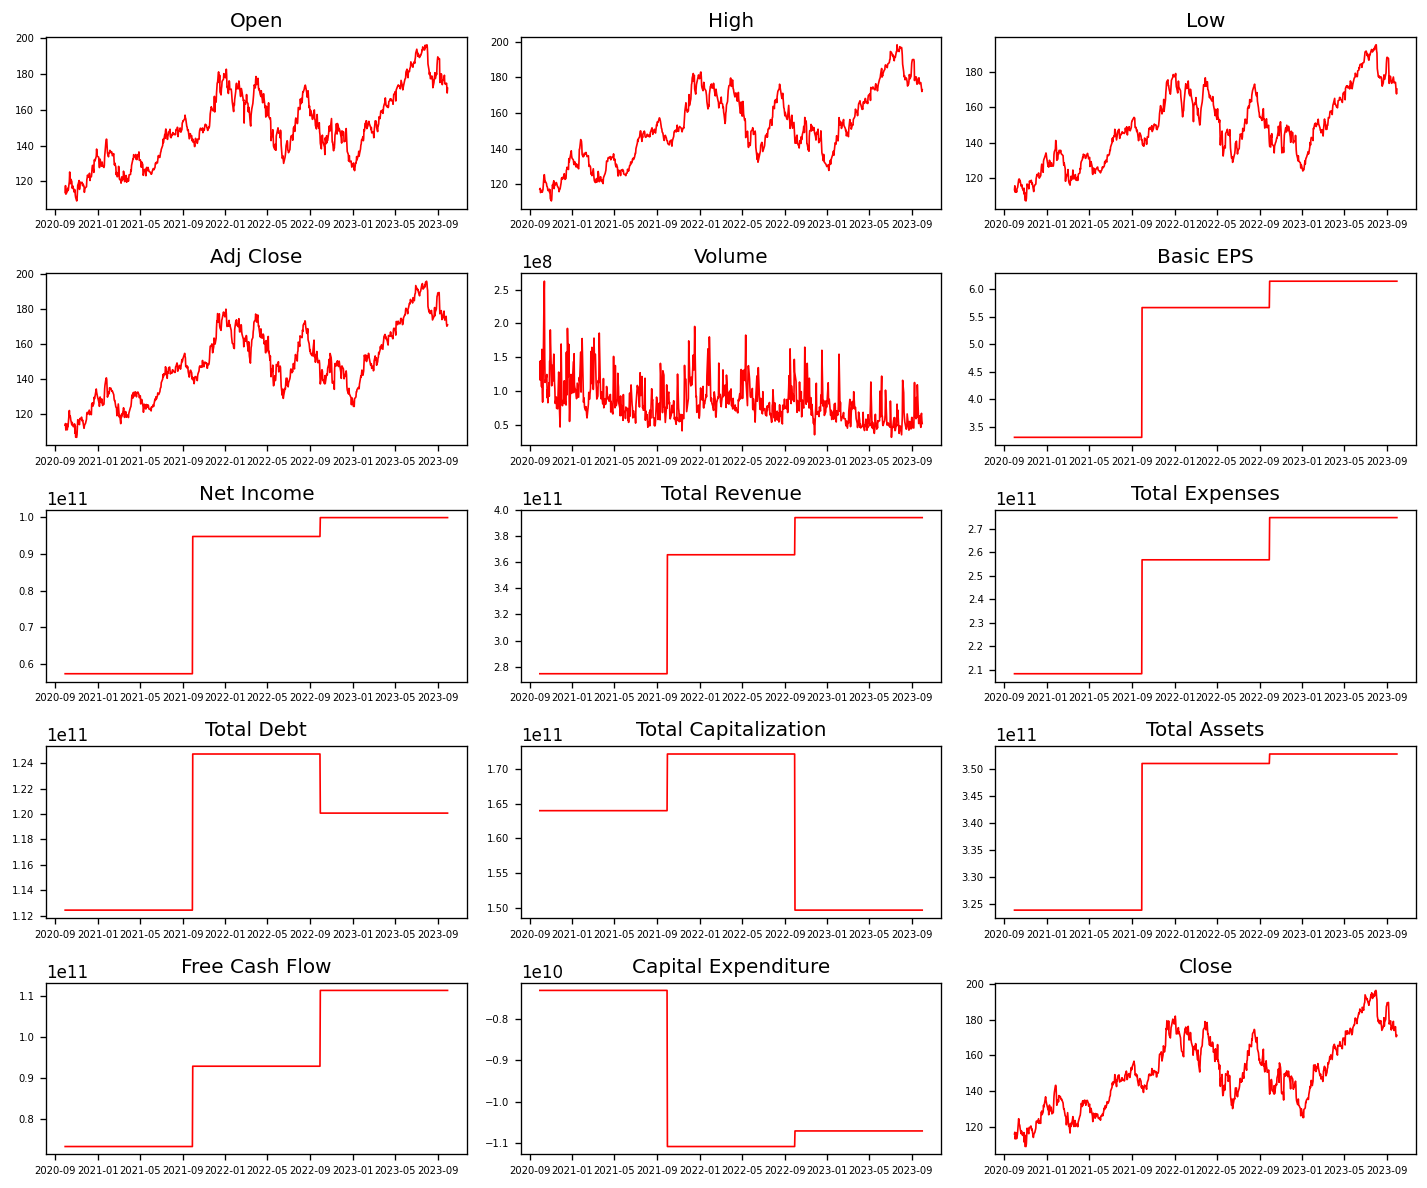

In [31]:
plot_columns(selected_stock_df)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Basic EPS'}>,
        <Axes: title={'center': 'Net Income'}>,
        <Axes: title={'center': 'Total Revenue'}>],
       [<Axes: title={'center': 'Total Expenses'}>,
        <Axes: title={'center': 'Total Debt'}>,
        <Axes: title={'center': 'Total Capitalization'}>,
        <Axes: title={'center': 'Total Assets'}>],
       [<Axes: title={'center': 'Free Cash Flow'}>,
        <Axes: title={'center': 'Capital Expenditure'}>,
        <Axes: title={'center': 'Close'}>, <Axes: >]], dtype=object)

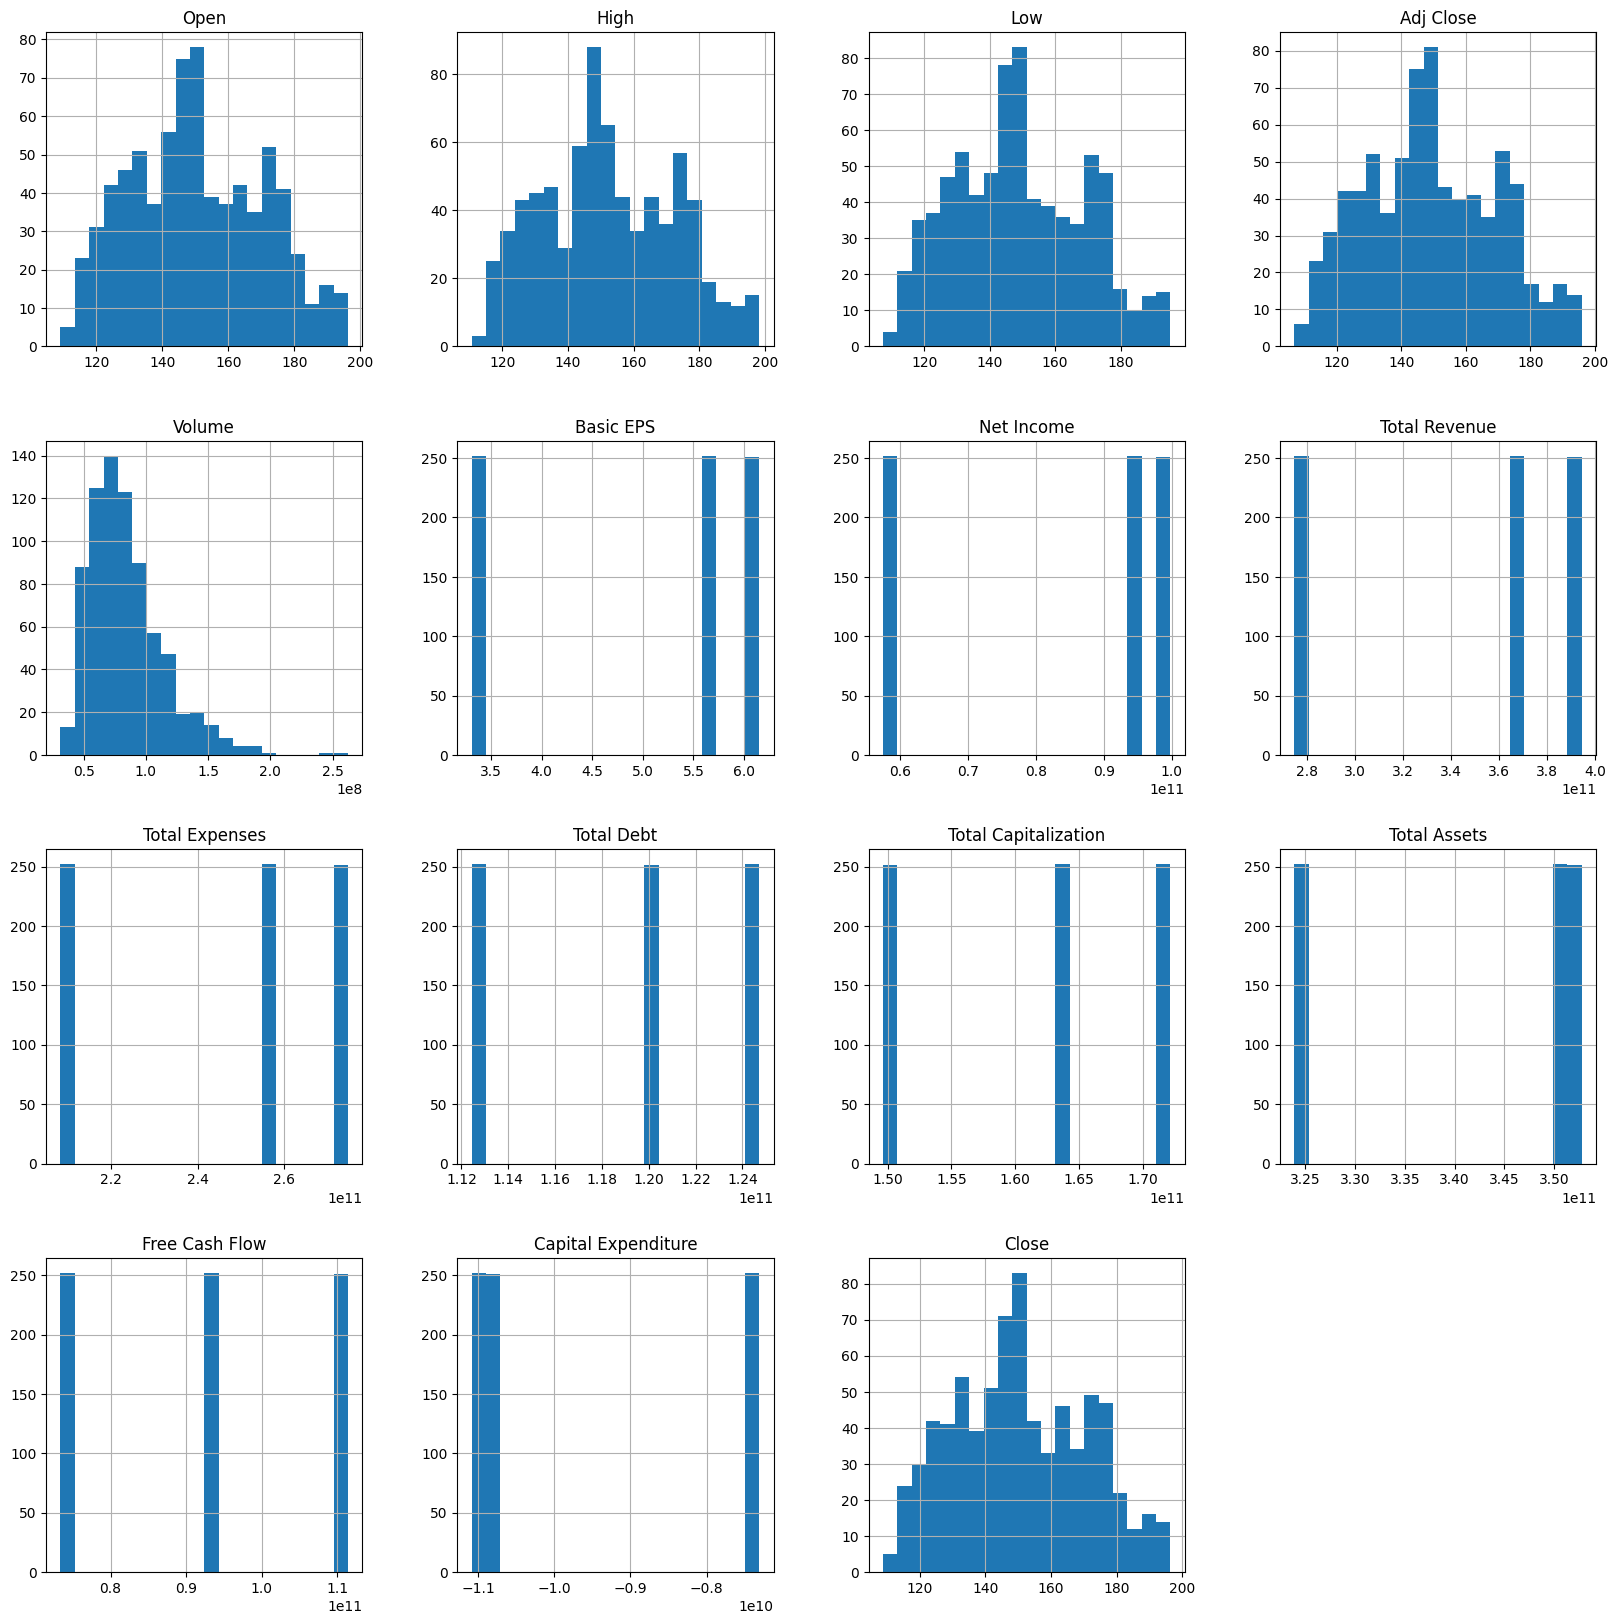

In [32]:
# Plot histograms for all the columns in the Google dataframe
selected_stock_df.hist(bins=20, figsize=(20, 20))

# Bivariate Analysis

## Granger’s Causality Test

In [33]:
# The rows of the output are the response variables, while the columns are the predoctors.
# The values are called P-Values, p-value < 0.05 means that X does not cause Y.
def granger_causation_matrix(data):    
    test = 'ssr_chi2test'
    verbose=False
    maxlag=12
    columns = data.columns
    df = pd.DataFrame(np.zeros((len(columns), len(columns))), columns=columns, index=columns)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in columns]
    df.index = [var + '_y' for var in columns]
    return df

granger_causation_matrix(selected_stock_df) 

c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\sta

,Open_x,High_x,Low_x,Adj Close_x,Volume_x,Basic EPS_x,Net Income_x,Total Revenue_x,Total Expenses_x,Total Debt_x,Total Capitalization_x,Total Assets_x,Free Cash Flow_x,Capital Expenditure_x,Close_x
Open_y,1.0000,0.0000,0.0000,0.0000,0.0438,0.0788,0.0842,0.0734,0.0718,0.2856,0.0270,0.0930,0.0695,0.1290,0.0000
High_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.1094,0.1170,0.1016,0.0991,0.3598,0.3845,0.1288,0.1016,0.1752,0.0000
Low_y,0.0000,0.0000,1.0000,0.0000,0.0542,0.1196,0.1297,0.1083,0.1042,0.0870,0.0035,0.1449,0.0973,0.1969,0.0000
Adj Close_y,0.0842,0.1051,0.1022,1.0000,0.1056,0.0614,0.0671,0.0556,0.0538,0.2438,0.1141,0.0761,0.0560,0.1135,0.0836
Volume_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0489,0.0000,0.0000,0.0000,0.0005,0.0000
Basic EPS_y,0.5318,0.5440,0.5069,0.4512,0.1785,1.0000,0.9645,0.9645,0.9645,0.9645,0.9645,0.9645,0.9645,0.9645,0.4550
Net Income_y,0.5217,0.5001,0.5021,0.4630,0.1806,0.9830,1.0000,0.9830,0.9830,0.9830,0.9830,0.9830,0.9830,0.9830,0.4663
Total Revenue_y,0.4629,0.6147,0.4252,0.4152,0.1412,0.9236,0.9236,1.0000,0.9236,0.9236,0.9236,0.9236,0.9236,0.9236,0.4193
Total Expenses_y,0.4286,0.5718,0.3825,0.3900,0.1255,0.8979,0.8979,0.8979,1.0000,0.8979,0.8979,0.8979,0.8979,0.8979,0.3942
Total Debt_y,0.3926,0.3516,0.3247,0.3235,0.0660,0.8514,0.8514,0.8514,0.8514,1.0000,0.8514,0.8514,0.8514,0.8514,0.3193


## Scatter Plot between features and target

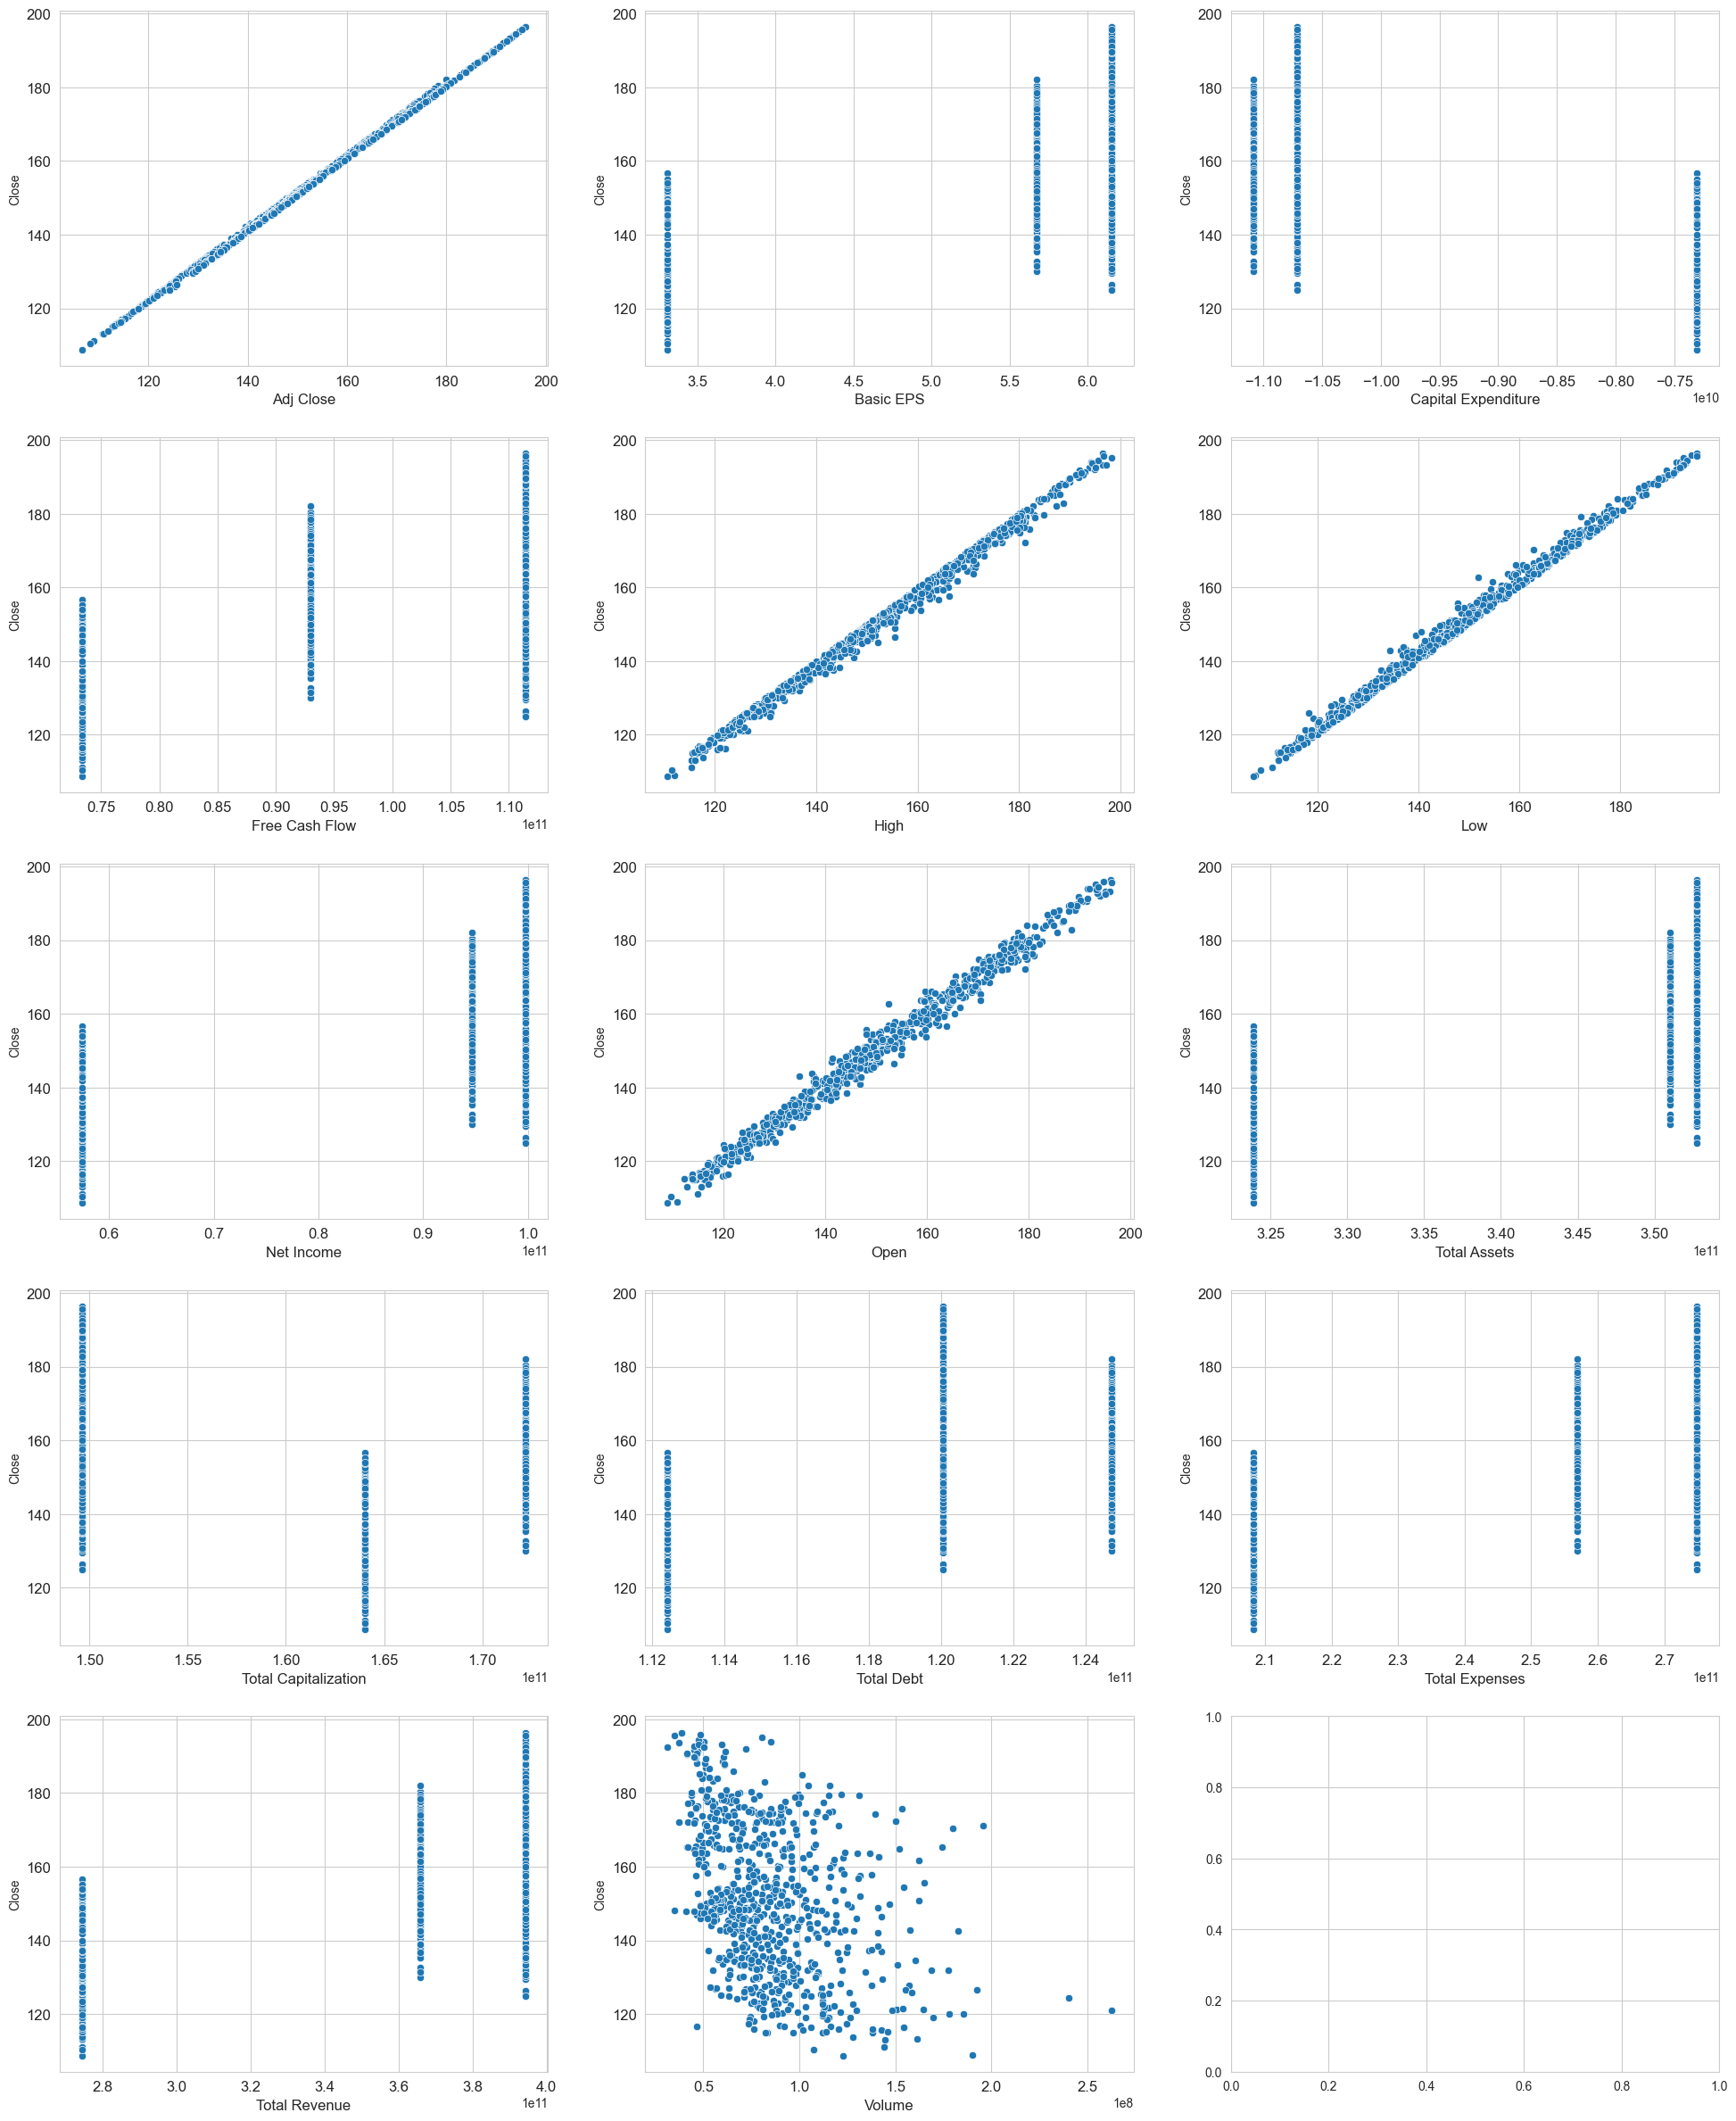

In [34]:
features = selected_stock_df.columns.difference(['Close']).values
i = 0
sns.set_style('whitegrid')
fig, ax = plt.subplots(5,3,figsize=(24,30))

for feature in features:
    i += 1
    plt.subplot(5,3,i)
    sns.scatterplot(x=feature, y='Close', data=selected_stock_df[[feature, 'Close']])
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

# Multivariate Analysis

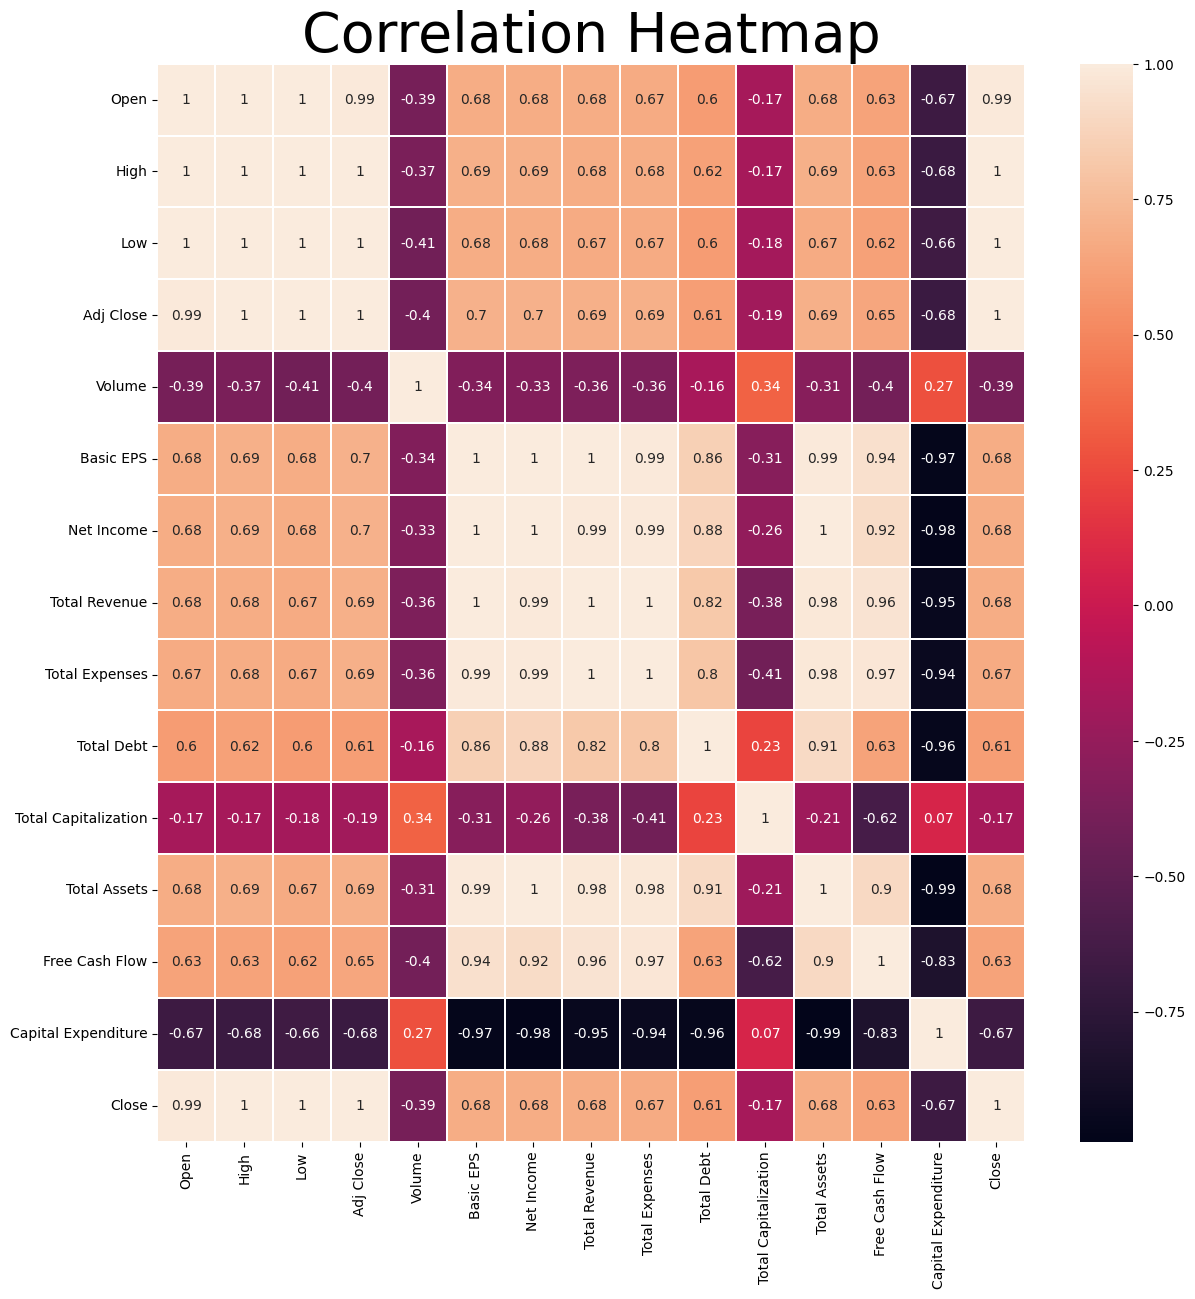

In [34]:
# Correlation between columns using Pearson method
corr = selected_stock_df.corr().round(2)
fig, ax = plt.subplots(figsize=(14,14))
s = sns.heatmap(corr, annot=True, linewidths=0.1, ax=ax)
s.set_title('Correlation Heatmap', fontsize=40)
plt.show()

# Drop columns with correlation coefficient < 0.5

In [55]:
threshold = 0.5
target_column = "Close"
correlation_coefficients = selected_stock_df.corr()[target_column]
columns_to_drop = correlation_coefficients[abs(correlation_coefficients) < threshold].index
selected_stock_df = selected_stock_df.drop(columns=columns_to_drop)

In [56]:
print(selected_stock_df.columns)

Index(['Open', 'High', 'Low', 'Adj Close', 'Basic EPS', 'Net Income',
       'Total Revenue', 'Total Expenses', 'Total Debt', 'Total Assets',
       'Free Cash Flow', 'Capital Expenditure', 'Close'],
      dtype='object')


# Outliers

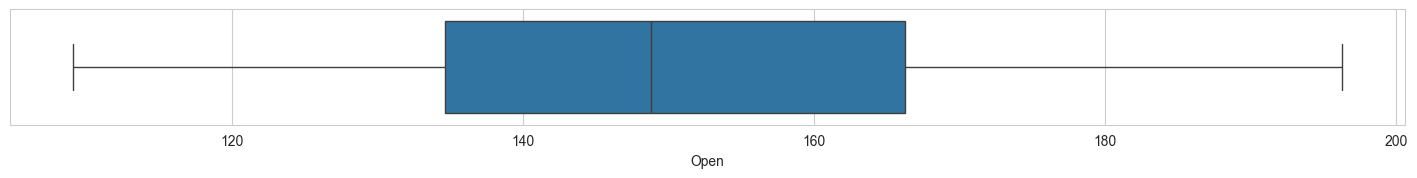

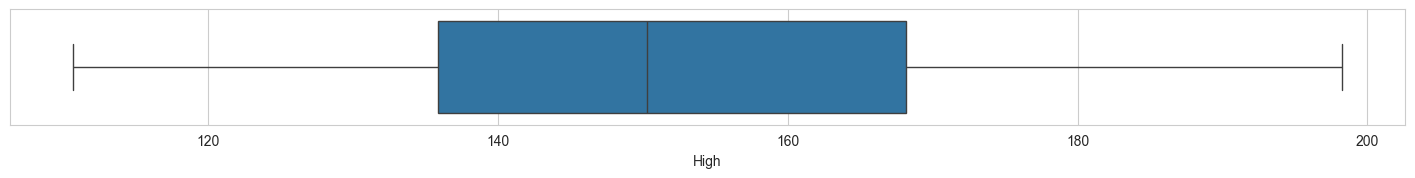

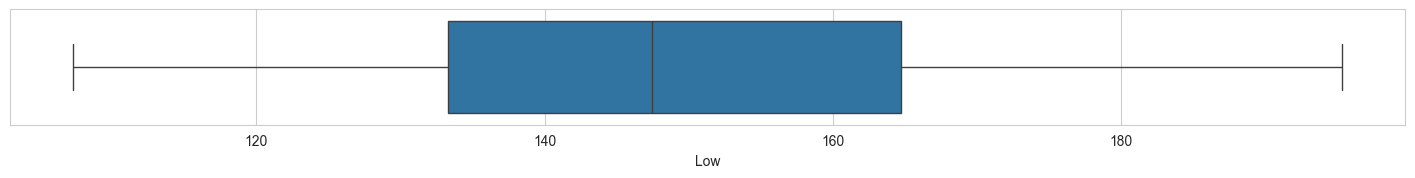

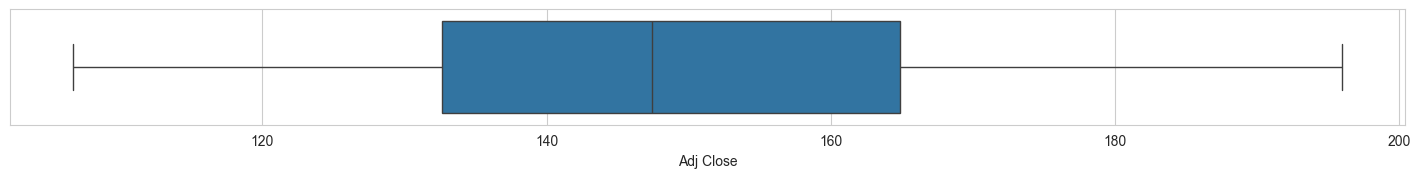

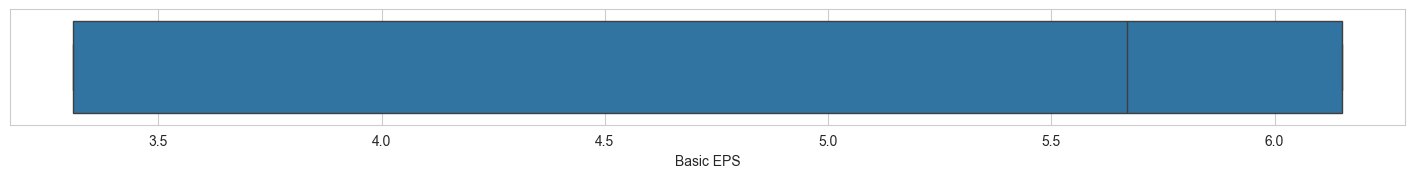

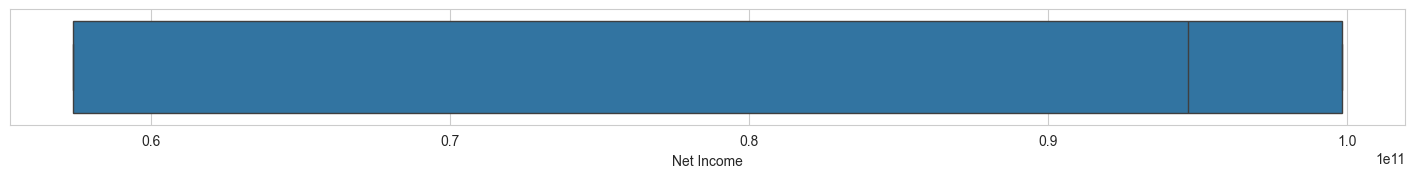

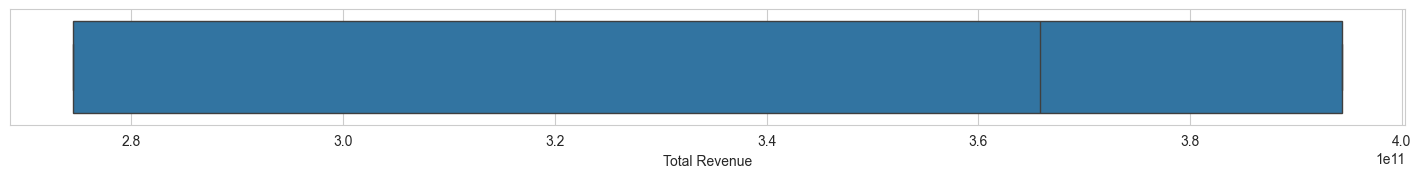

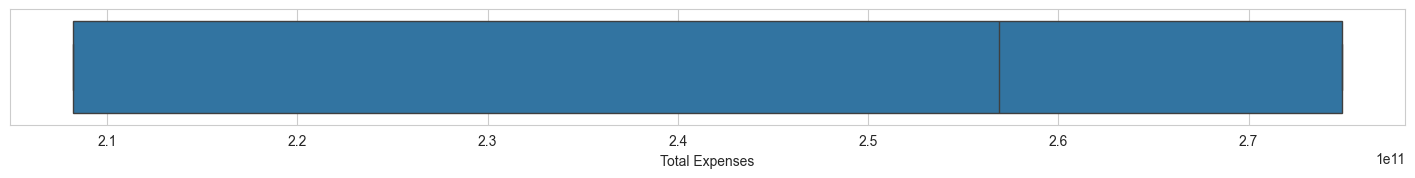

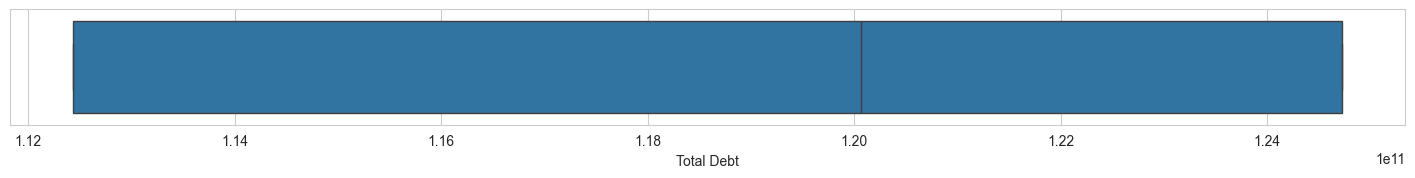

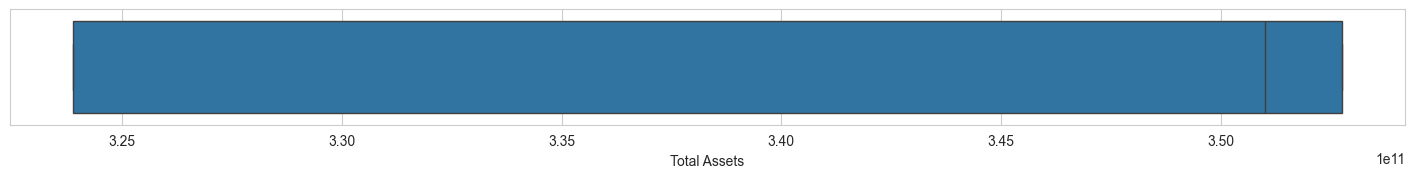

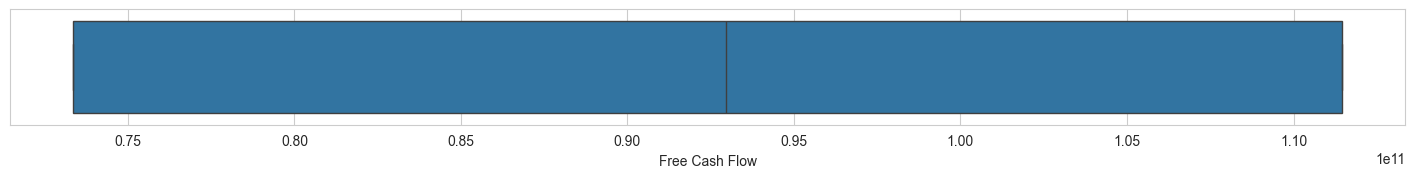

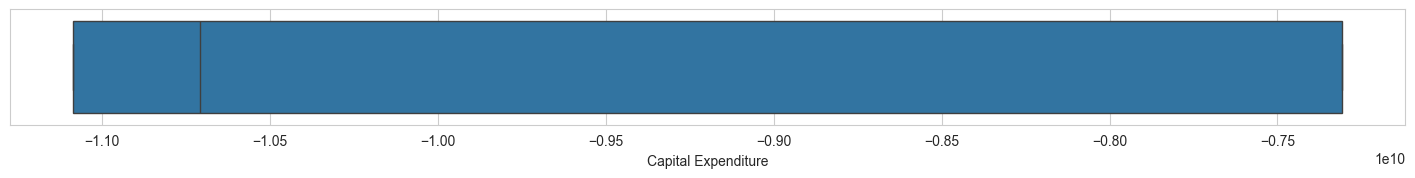

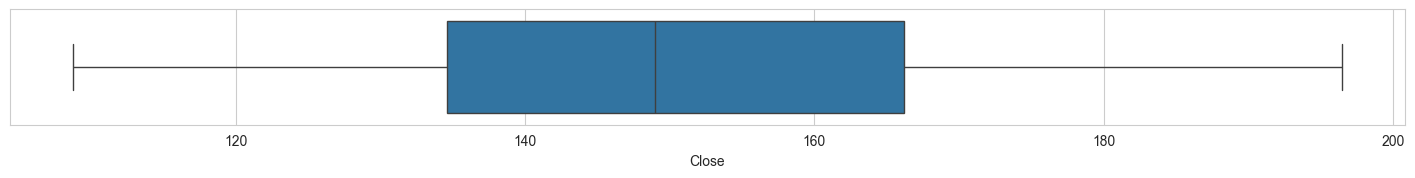

In [38]:
# Boxplot before handling outliers
for column in selected_stock_df:    
    fig, ax = plt.subplots(figsize=(18,1.5))
    sns.boxplot(data=selected_stock_df, x=column)

# Normalization

In [27]:
def min_max_normalize(df):
  for column in df.columns:
    if column != "Close":
      df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
  return df

In [31]:
# Apply min-max normalization
df_normalized = selected_stock_df.copy()
df_normalized = min_max_normalize(df_normalized)

# SVR Model

## Make prediction for the last 30 days with lagging

In [23]:
df = deepcopy(selected_stock_df)

In [24]:
# Create lag features
num_lags = 30
for column in df.columns:
    for i in range(1, num_lags+1):
        df[f'{column}_lag_{i}'] = df[column].shift(i)

C:\Users\Adham\AppData\Local\Temp\ipykernel_12980\2578127502.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_lag_{i}'] = df[column].shift(i)
C:\Users\Adham\AppData\Local\Temp\ipykernel_12980\2578127502.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_lag_{i}'] = df[column].shift(i)
C:\Users\Adham\AppData\Local\Temp\ipykernel_12980\2578127502.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

In [25]:
df = df.fillna(df.mean())

In [26]:
X = df.drop('Close', axis=1)
y = df['Close']
X_train, X_test = X.iloc[:-30], X.iloc[-30:]
y_train, y_test = y.iloc[:-30], y.iloc[-30:]

In [27]:
# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
regressor = SVR(kernel='poly')
regressor.fit(X_train_scaled, y_train)

SVR(kernel='poly')

In [29]:
y_pred = regressor.predict(X_test_scaled)

In [30]:
# Metrics for lagged features
r2 = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
mae = metrics.mean_absolute_error(y_test, y_pred)

print(f"R-Squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

R-Squared: 0.5978774941847882
Mean Squared Error: 10.987516854213652
Root Mean Squared Error: 3.314742351105686
Mean Absolute Error: 2.715962093815561


In [31]:
y_pred_series = pd.Series(y_pred, index=y_test.index)

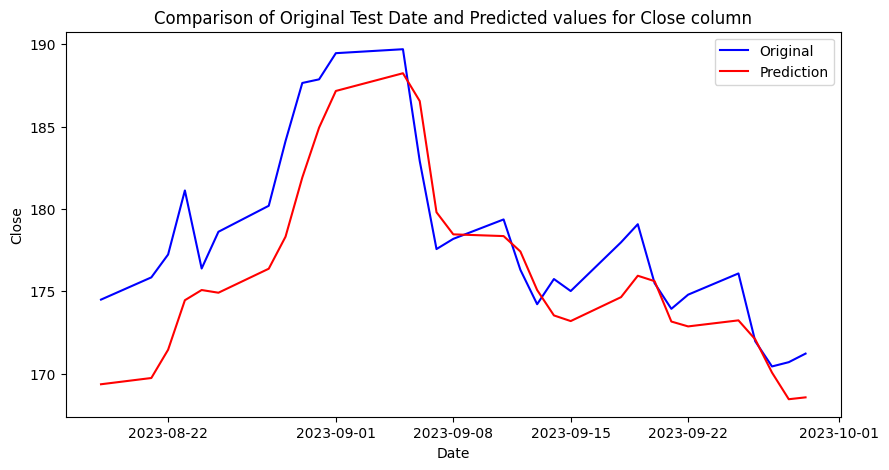

In [32]:
# Plotting the reverse differenced Close column to plot original data
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Original', color='blue')
plt.plot(y_pred_series.index, y_pred_series, label='Prediction', color='red')

# Customize the plot
plt.title('Comparison of Original Test Date and Predicted values for Close column')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

# Show the plot
plt.show()

## Make prediction for the next 30 days in the future using lagging and interpolation

In [68]:
df = deepcopy(selected_stock_df)

In [70]:
# Create lag features
num_lags = 30
lagged_columns = []
df_shifting = deepcopy(df)
for column in df.columns:
    for i in range(1, num_lags+1):
        df_temp = pd.DataFrame({f'{column}_lag_{i}': df_shifting[column].shift(i)})
        lagged_columns.append(df_temp)
lagged_df = pd.concat(lagged_columns, axis=1)
df = pd.concat([df, lagged_df], axis=1)

In [72]:
df = df.fillna(df.mean())

In [73]:
X = df.drop('Close', axis=1)
y = df['Close']

In [74]:
# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
svr = SVR(kernel='poly')
svr.fit(X_scaled, y)

SVR(kernel='poly')

In [76]:
future_idx = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=num_lags, freq='B')
future_df = pd.DataFrame(index=future_idx)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])

C:\Users\Adham\AppData\Local\Temp\ipykernel_12980\2897727418.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['isFuture'] = False


In [77]:
columns_to_interpolate = df_and_future.columns.difference(['Close'])
df_and_future[columns_to_interpolate] = df_and_future[columns_to_interpolate].interpolate(method='spline', order=2)

c:\Python311\Lib\site-packages\scipy\interpolate\_fitpack2.py:313: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
c:\Python311\Lib\site-packages\scipy\interpolate\_fitpack2.py:313: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
c:\Python311\Lib\site-packages\scipy\interpolate\_fitpack2.py:313: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned 

In [65]:
future_with_features = df_and_future.query('isFuture').copy()

In [66]:
FEATURES = future_with_features.columns.difference(["Close", "isFuture"])
scaler = MinMaxScaler()
future_with_features[FEATURES] = scaler.fit_transform(future_with_features[FEATURES])
future_predictions = svr.predict(future_with_features[FEATURES])
future_predictions_df = pd.DataFrame(index=future_with_features.index, data={'Predictions': future_predictions})

c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


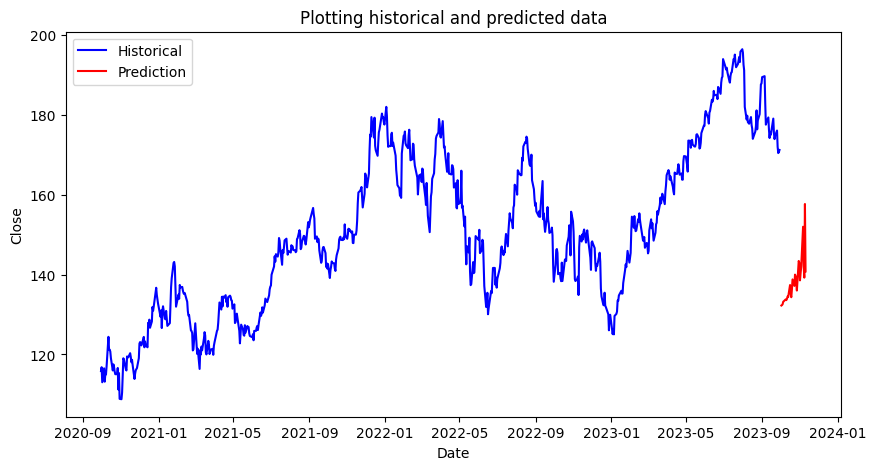

In [67]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label="Historical", color="blue")
plt.plot(future_predictions_df.index, future_predictions_df, label="Prediction", color="red")

# Customize the plot
plt.title("Plotting historical and predicted data")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()

# Show the plot
plt.show()